# 문제 1

### 키와 몸무게의 상관관계를 scikit-learn 패키지를 사용한 Linear Regression 통해 파악하기
#### 다음 단계를 따라 코드를 작성하세요

In [1]:
# 1) 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2) csv 파일 가져오기 
data = pd.read_csv("./size1.csv")

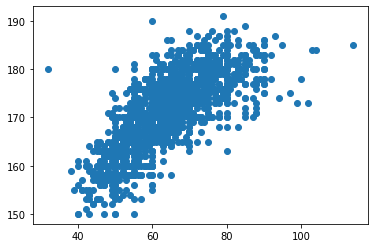

In [3]:
# 3) matplotlib으로 시각화 해보기 
x = data['weight']
y = data['height']
plt.plot(x,y, 'o')
plt.show()

In [21]:
# 4) 모델을 생성하고 데이터를 fit시킨다 
x=np.array(x).reshape(-1,1) # x data를 numpy 2차원으로 변경
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# 5) 다음 값을 구하시오

# 5-1) 몸무게 45인 사람 키를 예측해보시오
predicted = model.predict(np.array([45]).reshape(-1,1))
print(f"몸무게 45kg 키 예측값 : {predicted}")

# 5-2) 절편값, 회귀 계수값
print(f"절편값 : {model.intercept_}")
print(f"회귀 계수값 {model.coef_}")


몸무게 45kg 키 예측값 : [161.59315751]
절편값 : 138.749475281907
회귀 계수값 [0.50763738]


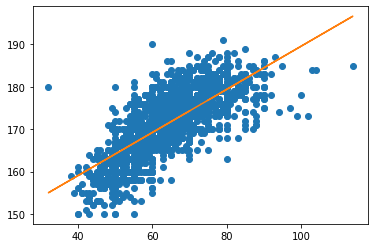

In [28]:
# 6) 선형관계 나타내서 그래프 출력 
plt.plot(x,y,'o')
plt.plot(x,model.predict(x))
plt.show()

# 문제 2
### 과소적합과 과대적합의 특징을 설명하고 편향-분산 트레이드 오프에서 어떠한 관계를 갖는지 설명하세요.

과소적합은 학습 데이터의 패턴을 지나치게 단순화한 것이고, 과대적합은 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 모델이다. 과소적합은 작은 분산과 높은 편향(저분산, 고편향)을 가지고 과대적합은 높은 분산과 낮은 편향(고분산, 저편향)을 가진다.

# 문제 3 (1)
## 단항식 회귀 계수를 다항식 회귀 계수로 변환하기

1. Position_Salaries 데이터를 불러오세요. <br>
2. 데이터의 **"Level" 열**의 1~6 데이터로 **2X3 행렬**을 만들어 **일차 단항식 계수**를 다음과 같이 출력하세요. <br>
      일차 단항식 계수 피처: <br>
     [[1 2 3] <br>
      [4 5 6]] <br>
- 주어진 3차 다항 회귀 결정 함수식을 적용하여 **삼차 다항식 결정값**을 다음과 같이 출력하세요. <br>
     삼차 다항식 결정값: <br>
     [ ? ? ]   <br>
- PolynomialFeatures 클래스를 이용해 **3차 다항식 계수**를 다음과 같이 출력하세요. <br>
    3차 다항식 계수 feature: <br>
    [ ! ! ] <br>  * '!'는 개수를 의미하는 것이 아닙니다! <br>
     
   

In [30]:
salary = pd.read_csv("./Position_salaries.csv")

In [51]:
x=np.array(salary["Level"][:6]).reshape(2,3)
print("<일차 단항식 계수>","\n",x)

<일차 단항식 계수> 
 [[1 2 3]
 [4 5 6]]


In [54]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

def polynomial_func(x):
    y = 1+2*x[:,0]+3*x[:,0]**2+4*x[:,1]**3
    return y

y = polynomial_func(x)
print("<삼차 다항식 결정값>","\n", y)

<삼차 다항식 결정값> 
 [ 38 557]


In [53]:
poly = PolynomialFeatures(degree=3)
poly.fit(x)
poly_ftr = poly.transform(x)
print("<3차 다항식 계수>","\n",poly_ftr)

<3차 다항식 계수> 
 [[  1.   1.   2.   3.   1.   2.   3.   4.   6.   9.   1.   2.   3.   4.
    6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.   6.  16.  20.  24.  25.  30.  36.  64.  80.  96. 100.
  120. 144. 125. 150. 180. 216.]]


# 문제 3 (2)
## 다항 회귀 구현하기: Pipeline 객체

* Pipeline 객체를 이용해 다항 회귀를 구현하고, 다음과 같이 출력하세요. <br>
    Polynomial 회귀 계수:   <br>
    [ ? ] 
   <br> * '?'는 개수를 의미하는 것이 아닙니다! <br>  *  계수 값은 소수점 3자리에서 반올림 해주세요.

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [68]:
model = Pipeline([("poly",PolynomialFeatures(degree=3)),("linear", LinearRegression())])
model.fit(x,y)
print(np.round(model.named_steps["linear"].coef_,3))
print(np.round(model.named_steps["linear"].intercept_))

[0.    0.01  0.01  0.01  0.05  0.06  0.07  0.07  0.08  0.089 0.209 0.259
 0.308 0.318 0.378 0.447 0.388 0.457 0.537 0.626]
-8.0


# 문제 4
## 회귀 곡선 예측하기

1. Fish 데이터를 불러온다.<br>
2. **"Width"** 열의 값을 피처에, **"Weight"** 열의 값을 target에 지정한다. <br>
3. for문을 이용해 다항 회귀 차수가 **1,9,15**으로 변화함에 따라 변화하는 Polynomial을 변환한다.<br> * 상수항은 추가 하지 않습니다.<br> * Pipeline 객체를 사용하세요!<br>
4. cross_val_score 함수를 이용해 다항 회귀를 평가한다. <br> * 옵션: scoring="neg_mean_squared_error", cv=10 <br>
5. 회귀 계수와 MSE 값을 다음과 같이 출력한다.<br>
   Degree ? 회귀 계수는 ? 입니다.<br>
   Degree ? MSE는 ? 입니다.<br>
6. 1부터 7까지의 값 중에 200개를 랜덤으로 추출하여 **테스트용 피처 데이터**를 생성한다.<br>
7. 관측값, 예측 곡선을 출력한다.<br> * 선의 모양, 점의 크기, 점 색깔은 자유<br> * 범례의 각 label은 관측값(Samples),  예측 곡선(Predict function)으로 지정한다.<br> * x축 label은 x, y축 label은 y로 지정하고 범례는 자동으로 위치시킨다.<br> * 각 그래프의 제목은 'Degree ?' (?에 해당 차수 입력)으로 지정한다. <br>


In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [85]:
fish = pd.read_csv("./Fish.csv")
X = np.array(fish["Width"]).reshape(-1,1)
y = fish["Weight"]

[  -6804.45893493  -15227.56401119  -13715.2915827   -20248.16013396
   -4934.86651276  -14957.2546641   -29789.08563707  -11795.12106129
 -119947.91843913 -112678.43107664]
Degree : 1, 회귀 계수 : [188.24855477]
Degree : 1, MSE : 35009.81520537753
[-7.59941779e+03 -8.71773084e+03 -2.20635106e+03 -1.55940161e+04
 -8.45823828e+02 -1.40689607e+03 -3.01371860e+04 -1.69493441e+06
 -1.09718334e+05 -3.38152074e+04]
Degree : 9, 회귀 계수 : [-3.08705365e+03  4.22928600e+03 -3.20675025e+03  1.49341126e+03
 -4.42423213e+02  8.33975535e+01 -9.62945638e+00  6.17751481e-01
 -1.68055854e-02]
Degree : 9, MSE : 190497.5371711539
[-6.62238154e+03 -1.66854028e+04 -3.12861490e+03 -1.47609595e+04
 -9.15177335e+02 -1.23313063e+03 -2.37930213e+04 -5.28400322e+07
 -1.09073792e+05 -3.50791940e+04]
Degree : 15, 회귀 계수 : [ 3.58837113e+02  2.00444971e+02 -1.77699351e+02 -2.50954782e+02
  1.11297178e+02  2.20017878e+02 -2.30632496e+02  9.36798163e+01
 -1.68297973e+01 -2.14730688e-01  7.33220230e-01 -1.56336597e-01
  1.634

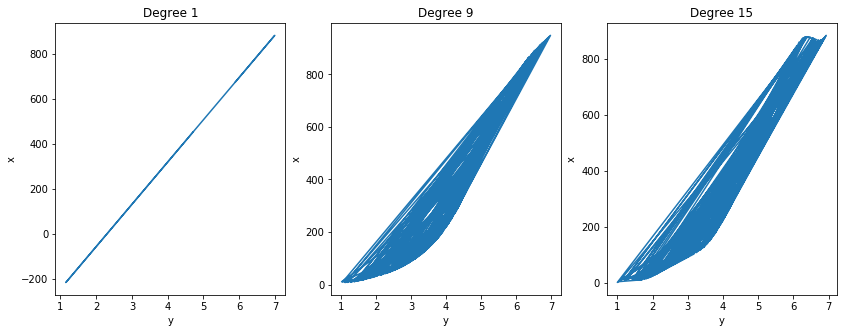

In [92]:
degrees = [1,9,15]
plt.figure(figsize = (14,5))

for idx, degree in enumerate(degrees):
    # Pipeline 생성
    pipe = Pipeline([("polynomial", PolynomialFeatures(degree = degree, include_bias = False)),
                    ("linear", LinearRegression())])
    pipe.fit(X,y)
    
    # 평가
    scores = cross_val_score(pipe,X,y,scoring="neg_mean_squared_error",cv = 10)
    # mse 는 작을수록 좋기 때문에 음수를 붙인 값으로 반환해줌
    print(scores)
    coefficients = pipe.named_steps["linear"].coef_
    print(f"Degree : {degree}, 회귀 계수 : {coefficients}")
    print(f"Degree : {degree}, MSE : {-1*np.mean(scores)}")
    # 따라서 최종 출력할 땐 -를 다시 붙여주어야 함
    
    # 예측
    test_x = np.random.uniform(1,7,200).reshape(-1,1) # 1부터 7 중에 랜덤으로 200개 추출 
    predicted = pipe.predict(test_x)
    
    # 시각화
    plt.subplot(1,len(degrees), idx+1)
    plt.plot(test_x,predicted)
    plt.xlabel("y")
    plt.ylabel("x")
    plt.title(f"Degree {degree}")
